In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import yfinance as yf 
import statsmodels.api as sm
import statsmodels as sms

%matplotlib inline

In [2]:
# Run an analysis on the volume of AMC

amc_vol = pd.DataFrame(yf.download('AMC', "2020-07-01", "2021-06-25", parse_dates=True, index_col='date'))

[*********************100%***********************]  1 of 1 completed


<AxesSubplot:title={'center':'% Change of AMC'}, xlabel='Date'>

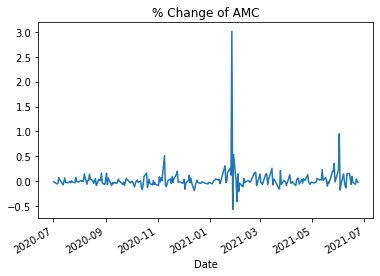

In [3]:
#Plot the percentage change of AMC overtime

amc_vol['Close'].pct_change().plot(title = '% Change of AMC')

In [4]:
# Structure data for GARCH model

returns = amc_vol.loc['2020':'2021'].Close.pct_change()*100
returns = returns.dropna()
returns

Date
2020-07-02   -0.875273
2020-07-06   -5.518764
2020-07-07   -3.504675
2020-07-08    7.263915
2020-07-09    3.160279
                ...   
2021-06-18   -2.420552
2021-06-21   -6.024299
2021-06-22    4.632792
2021-06-23    0.051482
2021-06-24   -2.744423
Name: Close, Length: 247, dtype: float64

In [5]:
# Use the GARCH model from statsmodels to give prediction on the volume for the next 10 trading days. The p and q paramaters are the lag time for the Auto Regression and Moving Average  

from arch import arch_model 
model = arch_model(returns, mean = 'Zero', vol='GARCH', p=1, q=1)

results = model.fit()

results.summary()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 1161.5747023439235
Iteration:      2,   Func. Count:     10,   Neg. LLF: 1055.292230691428
Iteration:      3,   Func. Count:     14,   Neg. LLF: 1162.067906715684
Iteration:      4,   Func. Count:     19,   Neg. LLF: 1055.0040917493461
Iteration:      5,   Func. Count:     23,   Neg. LLF: 1054.9951246332041
Iteration:      6,   Func. Count:     27,   Neg. LLF: 1054.945645996637
Iteration:      7,   Func. Count:     31,   Neg. LLF: 1054.7339423599487
Iteration:      8,   Func. Count:     35,   Neg. LLF: 1054.5439332784322
Iteration:      9,   Func. Count:     39,   Neg. LLF: 1054.4885657770221
Iteration:     10,   Func. Count:     43,   Neg. LLF: 1054.4845683181902
Iteration:     11,   Func. Count:     47,   Neg. LLF: 1054.484514090023
Iteration:     12,   Func. Count:     50,   Neg. LLF: 1054.4845119263807
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1054.484514090023
            Iteratio

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.004
Vol Model:                      GARCH   Log-Likelihood:               -1054.48
Distribution:                  Normal   AIC:                           2114.97
Method:            Maximum Likelihood   BIC:                           2125.50
                                        No. Observations:                  247
Date:                Tue, Jun 29 2021   Df Residuals:                      247
Time:                        23:51:34   Df Model:                            0
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega         41.6001    101.582      0.410      0.682 [-1.575e+02,2.407e+02]
alpha[1]       0.5348      0.262      2.040  4.136e-02    [2.096e-02,  1.049]
beta[1]        0.4652      0.450      1.034      0.301      [ -0.416,  1.347]
=============================================================================

Covariance estimator: robust
"""

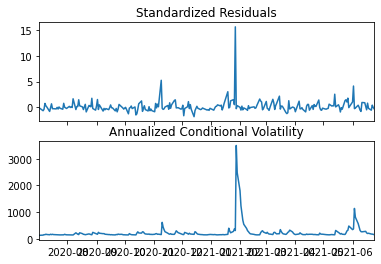

In [6]:
# Use the GARCH model to plot the Standardized Residuals and Annualized Conditional Volatility 

fig = results.plot(annualize = 'D')

In [7]:
#Find the last day in the dataset

last_day = amc_vol.index.max().strftime('%Y-%m-%d')
last_day

'2021-06-24'

In [8]:
# Make a forecast of the future volatility of AMC over the next 10 days using the GARCH model 

forecast_horizon = 10 

forecasts = results.forecast(start = "2021-06-24", horizon = forecast_horizon)

C:\Users\Luke\anaconda3\envs\pyvizenv\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


In [9]:
# Annualize the forecast 

inter = np.sqrt(forecasts.variance.dropna() * 252)
inter

,h.01,h.02,h.03,h.04,h.05,h.06,h.07,h.08,h.09,h.10
Date,,,,,,,,,,
2021-06-24,149.195613,180.949077,207.908166,231.752115,253.361955,273.268216,291.81973,309.260396,325.768675,341.47982


In [10]:
# Transpose the forecast so that it is easier to plot
final = inter.dropna().T
final.head()

Date,2021-06-24
h.01,149.195613
h.02,180.949077
h.03,207.908166
h.04,231.752115
h.05,253.361955


<AxesSubplot:title={'center':'GARCH Volume Forecast over the next 10 Trading Days'}>

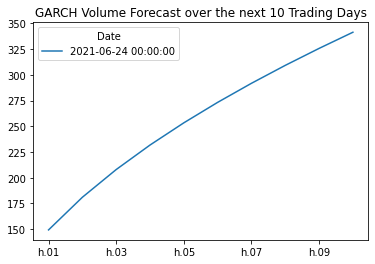

In [11]:
final.plot(title = 'GARCH Volume Forecast over the next 10 Trading Days')